# Predicting the Defaulters

In [180]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns # for making plots with seaborn
color = sns.color_palette()
import sklearn.metrics as metrics

import warnings
warnings.filterwarnings("ignore")

Let us now go ahead and read the dataset and check the first five rows of the dataset.

#### Importing the dataset

In [181]:
Company = pd.read_excel('Company_Data2015-1.xlsx')

#Glimpse of Data
Company.head()

,Co_Code,Co_Name,Networth Next Year,Equity Paid Up,Networth,Capital Employed,Total Debt,Gross Block,Net Working Capital,Current Assets,...,PBIDTM (%)[Latest],PBITM (%)[Latest],PBDTM (%)[Latest],CPM (%)[Latest],APATM (%)[Latest],Debtors Velocity (Days),Creditors Velocity (Days),Inventory Velocity (Days),Value of Output/Total Assets,Value of Output/Gross Block
0,16974,Hind.Cables,-8021.60,419.36,-7027.48,-1007.24,5936.03,474.30,-1076.34,40.50,...,0.00,0.00,0.00,0.00,0.00,0,0,45.0,0.00,0.00
1,21214,Tata Tele. Mah.,-3986.19,1954.93,-2968.08,4458.20,7410.18,9070.86,-1098.88,486.86,...,-10.30,-39.74,-57.74,-57.74,-87.18,29,101,2.0,0.31,0.24
2,14852,ABG Shipyard,-3192.58,53.84,506.86,7714.68,6944.54,1281.54,4496.25,9097.64,...,-5279.14,-5516.98,-7780.25,-7723.67,-7961.51,97,558,0.0,-0.03,-0.26
3,2439,GTL,-3054.51,157.30,-623.49,2353.88,2326.05,1033.69,-2612.42,1034.12,...,-3.33,-7.21,-48.13,-47.70,-51.58,93,63,2.0,0.24,1.90
4,23505,Bharati Defence,-2967.36,50.30,-1070.83,4675.33,5740.90,1084.20,1836.23,4685.81,...,-295.55,-400.55,-845.88,379.79,274.79,3887,346,0.0,0.01,0.05


#### Now, let us check the number of rows (observations) and the number of columns (variables)

In [182]:
print('The number of rows (observations) is',Company.shape[0],'\n''The number of columns (variables) is',Company.shape[1])

The number of rows (observations) is 3586 
The number of columns (variables) is 67


#### Checking datatype of all columns

In [183]:
Company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3586 entries, 0 to 3585
Data columns (total 67 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Co_Code                              3586 non-null   int64  
 1   Co_Name                              3586 non-null   object 
 2   Networth Next Year                   3586 non-null   float64
 3   Equity Paid Up                       3586 non-null   float64
 4   Networth                             3586 non-null   float64
 5   Capital Employed                     3586 non-null   float64
 6   Total Debt                           3586 non-null   float64
 7   Gross Block                          3586 non-null   float64
 8   Net Working Capital                  3586 non-null   float64
 9   Current Assets                       3586 non-null   float64
 10  Current Liabilities and Provisions   3586 non-null   float64
 11  Total Assets/Liabilities      

#### Now, let us check the basic measures of descriptive statistics for the continuous variables

In [184]:
Company.describe()

,Co_Code,Networth Next Year,Equity Paid Up,Networth,Capital Employed,Total Debt,Gross Block,Net Working Capital,Current Assets,Current Liabilities and Provisions,...,PBIDTM (%)[Latest],PBITM (%)[Latest],PBDTM (%)[Latest],CPM (%)[Latest],APATM (%)[Latest],Debtors Velocity (Days),Creditors Velocity (Days),Inventory Velocity (Days),Value of Output/Total Assets,Value of Output/Gross Block
count,3586.000000,3586.000000,3586.000000,3586.000000,3586.000000,3586.000000,3586.000000,3586.000000,3586.000000,3586.000000,...,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3586.000000,3.586000e+03,3483.000000,3586.000000,3586.000000
mean,16065.388734,725.045251,62.966584,649.746299,2799.611054,1994.823779,594.178829,410.809665,1960.349172,391.992078,...,-51.162890,-109.213414,-311.570357,-307.005632,-365.056187,603.894032,2.057855e+03,79.644559,0.819757,61.884548
std,19776.817379,4769.681004,778.761744,4091.988792,26975.135385,23652.842746,4871.547802,6301.218546,22577.570829,2675.001631,...,1795.131025,3057.635870,10921.592639,10676.149629,12500.051387,10636.759580,5.416948e+04,137.847792,1.201400,976.824352
min,4.000000,-8021.600000,0.000000,-7027.480000,-1824.750000,-0.720000,-41.190000,-13162.420000,-0.910000,-0.230000,...,-78870.450000,-141600.000000,-590500.000000,-572000.000000,-688600.000000,0.000000,0.000000e+00,-199.000000,-0.330000,-61.000000
25%,3029.250000,3.985000,3.750000,3.892500,7.602500,0.030000,0.570000,0.942500,4.000000,0.732500,...,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,8.000000e+00,0.000000,0.070000,0.270000
50%,6077.500000,19.015000,8.290000,18.580000,39.090000,7.490000,15.870000,10.145000,24.540000,9.225000,...,8.070000,5.230000,4.690000,3.890000,1.590000,49.000000,3.900000e+01,35.000000,0.480000,1.530000
75%,24269.500000,123.802500,19.517500,117.297500,226.605000,72.350000,131.895000,61.175000,135.277500,65.650000,...,18.990000,14.290000,14.110000,11.390000,7.410000,106.000000,8.900000e+01,96.000000,1.160000,4.910000
max,72493.000000,111729.100000,42263.460000,81657.350000,714001.250000,652823.810000,128477.590000,223257.560000,721166.000000,83232.980000,...,19233.330000,19195.700000,15640.000000,15640.000000,15266.670000,514721.000000,2.034145e+06,996.000000,17.630000,43404.000000


#### Creating a binary target variable using 'Networth_Next_Year' 

In [185]:
Company['default'] = np.where((Company['Networth Next Year'] > 0), 0, 1)

#### Checking top 10 rows

In [186]:
Company.head(10)

,Co_Code,Co_Name,Networth Next Year,Equity Paid Up,Networth,Capital Employed,Total Debt,Gross Block,Net Working Capital,Current Assets,...,PBITM (%)[Latest],PBDTM (%)[Latest],CPM (%)[Latest],APATM (%)[Latest],Debtors Velocity (Days),Creditors Velocity (Days),Inventory Velocity (Days),Value of Output/Total Assets,Value of Output/Gross Block,default
0,16974,Hind.Cables,-8021.60,419.36,-7027.48,-1007.24,5936.03,474.30,-1076.34,40.50,...,0.00,0.00,0.00,0.00,0,0,45.0,0.00,0.00,1
1,21214,Tata Tele. Mah.,-3986.19,1954.93,-2968.08,4458.20,7410.18,9070.86,-1098.88,486.86,...,-39.74,-57.74,-57.74,-87.18,29,101,2.0,0.31,0.24,1
2,14852,ABG Shipyard,-3192.58,53.84,506.86,7714.68,6944.54,1281.54,4496.25,9097.64,...,-5516.98,-7780.25,-7723.67,-7961.51,97,558,0.0,-0.03,-0.26,1
3,2439,GTL,-3054.51,157.30,-623.49,2353.88,2326.05,1033.69,-2612.42,1034.12,...,-7.21,-48.13,-47.70,-51.58,93,63,2.0,0.24,1.90,1
4,23505,Bharati Defence,-2967.36,50.30,-1070.83,4675.33,5740.90,1084.20,1836.23,4685.81,...,-400.55,-845.88,379.79,274.79,3887,346,0.0,0.01,0.05,1
5,2484,Usha Ispat,-2519.40,179.35,-2519.39,-1824.75,694.64,0.02,-1843.74,0.00,...,0.00,0.00,0.00,0.00,0,0,0.0,0.00,0.00,1
6,23633,Hanung Toys,-2125.05,30.82,-1031.57,1536.08,2567.65,949.98,804.82,834.86,...,-987.73,-396.67,-672.36,-1264.22,456,12,392.0,0.00,-0.01,1
7,3226,K S Oils,-2100.56,45.92,-1945.45,979.13,2664.04,920.67,263.95,705.76,...,-596.97,-456.40,-461.06,-610.80,828,622,799.0,-0.02,-0.03,1
8,1541,Quadrant Tele.,-1695.75,61.23,-1560.94,-613.79,597.82,1700.27,-1121.96,117.67,...,-20.43,-3.58,-3.58,-25.91,34,145,2.0,0.92,0.31,1
9,2334,ITI,-1677.18,288.00,-1947.85,86.35,1220.83,1329.82,-390.53,2536.78,...,18.18,9.76,9.76,8.71,1112,913,62.0,0.54,1.16,1


#### What does variable 'default' look like

In [187]:
Company['default'].value_counts()

0    3198
1     388
Name: default, dtype: int64

#### Checking proportion of default

In [188]:
Company['default'].value_counts(normalize = True)

0    0.891801
1    0.108199
Name: default, dtype: float64

#### Lets check for missing values in the dataset

In [189]:
Company.isnull().sum()

Co_Code                           0
Co_Name                           0
Networth Next Year                0
Equity Paid Up                    0
Networth                          0
                               ... 
Creditors Velocity (Days)         0
Inventory Velocity (Days)       103
Value of Output/Total Assets      0
Value of Output/Gross Block       0
default                           0
Length: 68, dtype: int64

In [190]:
Company.size

243848

In [191]:
Company.isnull().sum().sum()

118

There are missing values in the dataset

In [192]:
Company['default'].value_counts(normalize = True)
# Proportion for defaulters & non-defaulters are more or less unchanged
# Therefore will proceed with dropping the NA values.

0    0.891801
1    0.108199
Name: default, dtype: float64

In [193]:
# The proportion is more or less similar.

In [194]:
Company_X = Company.drop('default', axis = 1)
Company_Y = Company['default']

In [195]:
Company_X.head()

,Co_Code,Co_Name,Networth Next Year,Equity Paid Up,Networth,Capital Employed,Total Debt,Gross Block,Net Working Capital,Current Assets,...,PBIDTM (%)[Latest],PBITM (%)[Latest],PBDTM (%)[Latest],CPM (%)[Latest],APATM (%)[Latest],Debtors Velocity (Days),Creditors Velocity (Days),Inventory Velocity (Days),Value of Output/Total Assets,Value of Output/Gross Block
0,16974,Hind.Cables,-8021.60,419.36,-7027.48,-1007.24,5936.03,474.30,-1076.34,40.50,...,0.00,0.00,0.00,0.00,0.00,0,0,45.0,0.00,0.00
1,21214,Tata Tele. Mah.,-3986.19,1954.93,-2968.08,4458.20,7410.18,9070.86,-1098.88,486.86,...,-10.30,-39.74,-57.74,-57.74,-87.18,29,101,2.0,0.31,0.24
2,14852,ABG Shipyard,-3192.58,53.84,506.86,7714.68,6944.54,1281.54,4496.25,9097.64,...,-5279.14,-5516.98,-7780.25,-7723.67,-7961.51,97,558,0.0,-0.03,-0.26
3,2439,GTL,-3054.51,157.30,-623.49,2353.88,2326.05,1033.69,-2612.42,1034.12,...,-3.33,-7.21,-48.13,-47.70,-51.58,93,63,2.0,0.24,1.90
4,23505,Bharati Defence,-2967.36,50.30,-1070.83,4675.33,5740.90,1084.20,1836.23,4685.81,...,-295.55,-400.55,-845.88,379.79,274.79,3887,346,0.0,0.01,0.05


#### Let's check the number of outliers per column

In [196]:
Q1 = Company_X.quantile(0.25)
Q3 = Company_X.quantile(0.75)
IQR = Q3 - Q1
UL = Q3 + 1.5*IQR
LL = Q1 - 1.5*IQR

In [197]:
((Company_X > UL) | (Company_X < LL)).sum()

APATM (%)[Latest]                933
Adjusted PAT                     954
Book Value (Adj.) (Unit Curr)    486
Book Value (Unit Curr)           485
CEPS (annualised) (Unit Curr)    602
                                ... 
Total Assets/Liabilities         574
Total Debt                       583
Value Of Output                  559
Value of Output/Gross Block      481
Value of Output/Total Assets     150
Length: 67, dtype: int64

In [198]:
((Company_X > UL) | (Company_X < LL)).sum().sum()

42322

In [199]:
Company_X[((Company_X > UL) | (Company_X < LL))]= np.nan

In [200]:
Company_X.isnull().sum()

Co_Code                         291
Co_Name                           0
Networth Next Year              676
Equity Paid Up                  448
Networth                        650
                               ... 
Debtors Velocity (Days)         398
Creditors Velocity (Days)       391
Inventory Velocity (Days)       365
Value of Output/Total Assets    150
Value of Output/Gross Block     481
Length: 67, dtype: int64

In [201]:
Company_X.isnull().sum().sum()

42440

In [202]:
Company_X = Company_X.drop(['Co_Code', 'Co_Name','Networth Next Year'], axis = 1)

In [203]:
Company.shape

(3586, 68)

In [204]:
Company_sub1 = pd.concat([Company_X, Company_Y], axis =1 )

#### Let's visually inspect the missing values in our data

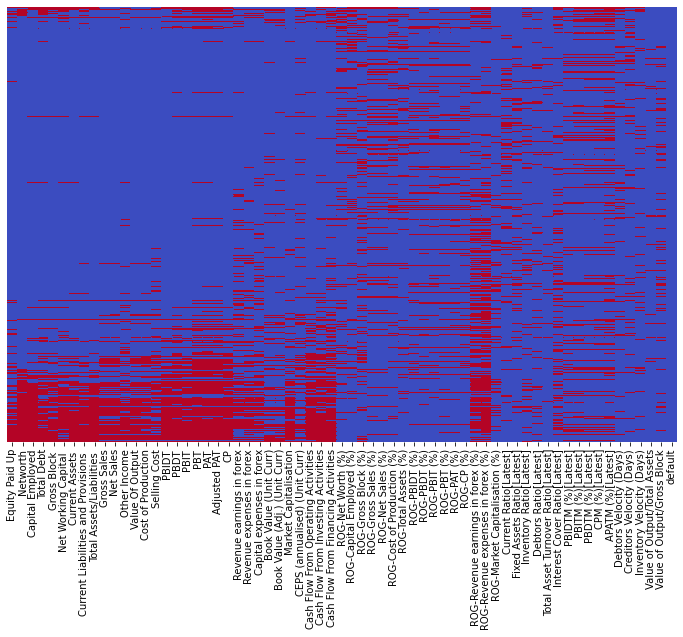

In [205]:
plt.figure(figsize = (12,8))
sns.heatmap(Company_sub1.isnull(), cbar = False, cmap = 'coolwarm', yticklabels = False)
plt.show()

#### We should inspect total missing values by each row.

In [206]:
Company_sub1.isnull().sum(axis = 1)

0       19
1       34
2       43
3       36
4       35
        ..
3581    30
3582    36
3583    34
3584    30
3585    36
Length: 3586, dtype: int64

#### Let's filter the data which is 90% or more complete at the row level

In [207]:
Company_sub1_temp = Company_sub1[Company_sub1.isnull().sum(axis = 1) <= 6]

In [208]:
Company_sub1_temp.shape

(1460, 65)

In [209]:
Company_sub1_temp['default'].value_counts()

0    1319
1     141
Name: default, dtype: int64

In [210]:
Company_sub1_temp['default'].value_counts(normalize=True)

0    0.903425
1    0.096575
Name: default, dtype: float64

In [211]:
Company_sub1.isnull().sum().sort_values(ascending = False)/Company_sub1.index.size

ROG-Revenue expenses in forex (%)      0.450363
ROG-Revenue earnings in forex (%)      0.367262
Cash Flow From Financing Activities    0.280257
PAT                                    0.267429
Adjusted PAT                           0.266035
                                         ...   
Debtors Ratio[Latest]                  0.103737
Inventory Velocity (Days)              0.101785
Total Asset Turnover Ratio[Latest]     0.056330
Value of Output/Total Assets           0.041829
default                                0.000000
Length: 65, dtype: float64

#### Dropping columns with more than 30% missing values 

In [212]:
Company_sub2 = Company_sub1.drop(['ROG-Revenue expenses in forex (%)', 'ROG-Revenue earnings in forex (%)'], axis = 1)

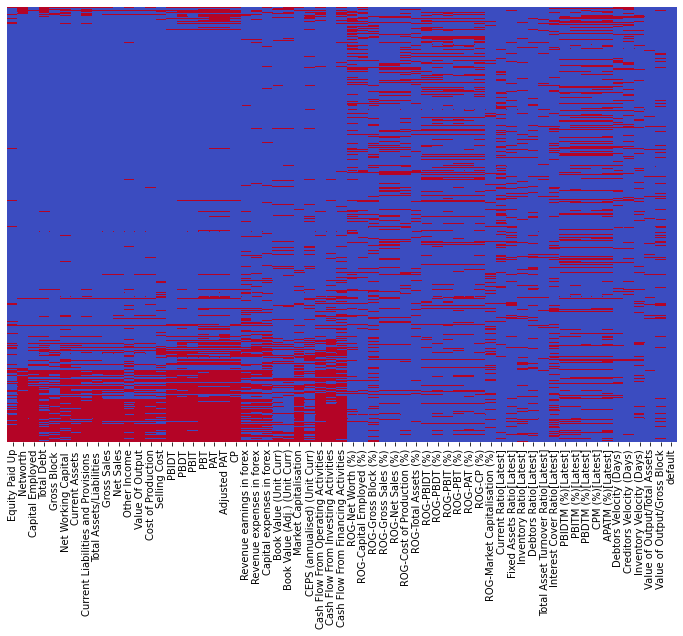

In [213]:
plt.figure(figsize = (12,8))
sns.heatmap(Company_sub2.isnull(), cbar = False, cmap = 'coolwarm', yticklabels = False)
plt.show()

#### Segregate the predictors and response

In [214]:
predictors = Company_sub2.drop('default', axis = 1)
response = Company_sub2['default']

##### Scale the predictors

In [215]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_predictors = pd.DataFrame(scaler.fit_transform(predictors), columns = predictors.columns)

In [216]:
Company_sub3 = pd.concat([scaled_predictors, response], axis = 1)

#### Imputing the remaining missing values

In [446]:
from sklearn.impute import KNNImputer #MICE FancyImpute

In [447]:
imputer = KNNImputer(n_neighbors=20)

In [448]:
Company_imputed = pd.DataFrame(imputer.fit_transform(Company_sub3), columns = Company_sub3.columns)

In [449]:
Company_imputed.isnull().sum()

Equity Paid Up                  0
Networth                        0
Capital Employed                0
Total Debt                      0
Gross Block                     0
                               ..
Creditors Velocity (Days)       0
Inventory Velocity (Days)       0
Value of Output/Total Assets    0
Value of Output/Gross Block     0
default                         0
Length: 63, dtype: int64

In [450]:
Company_imputed.isnull().sum().sum()

0

#### Checking the Variance Inflation Factor

In [451]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [452]:
calc_vif(Company_imputed).sort_values(by = 'VIF', ascending = False)

,variables,VIF
10,Net Sales,234.151750
12,Value Of Output,151.487873
9,Gross Sales,92.511342
35,ROG-Gross Sales (%),76.836722
36,ROG-Net Sales (%),76.704832
...,...,...
22,Revenue earnings in forex,1.368905
46,Current Ratio[Latest],1.299395
59,Inventory Velocity (Days),1.291223
45,ROG-Market Capitalisation (%),1.280890


In [453]:
Company_imputed = Company_imputed.drop(['Net Sales', 'Value Of Output', 'Gross Sales', 'ROG-Gross Sales (%)', 'ROG-Net Sales (%)'], axis = 1)
calc_vif(Company_imputed).sort_values(by = 'VIF', ascending = False)

,variables,VIF
16,PAT,24.816792
13,PBDT,22.552189
18,CP,19.075154
15,PBT,15.802774
8,Total Assets/Liabilities,14.145843
17,Adjusted PAT,12.100249
2,Capital Employed,11.821691
49,PBDTM (%)[Latest],11.558849
6,Current Assets,10.837357
14,PBIT,10.609799


In [454]:
Company_imputed = Company_imputed.drop(['PBDT', 'Total Assets/Liabilities ', 'CP', 'PAT', 'PBT', 'Capital Employed', 'Current Assets ', 'CPM (%)[Latest]', 'PBIDTM (%)[Latest]', 'PBIDT', 'PBIT', 'ROG-PBDT (%)', 'ROG-PBT (%)', 'ROG-CP (%)', 'Book Value (Unit Curr)', 'ROG-PBIDT (%)', 'Book Value (Adj.) (Unit Curr)', 'ROG-PAT (%)', 'Value of Output/Total Assets', 'ROG-PBIT (%)', 'Cost of Production', 'Total Asset Turnover Ratio[Latest]', 'Gross Block ', 'PBDTM (%)[Latest]', ], axis = 1)
calc_vif(Company_imputed).sort_values(by = 'VIF', ascending = False)

,variables,VIF
23,Fixed Assets Ratio[Latest],4.231355
32,Value of Output/Gross Block,4.109315
7,Adjusted PAT,3.279727
1,Networth,3.179097
4,Current Liabilities and Provisions,3.111603
28,APATM (%)[Latest],3.100422
27,PBITM (%)[Latest],2.785571
17,ROG-Capital Employed (%),2.555279
12,CEPS (annualised) (Unit Curr),2.416245
20,ROG-Total Assets (%),2.262664


#### Inspect possible correlations between independent variables 

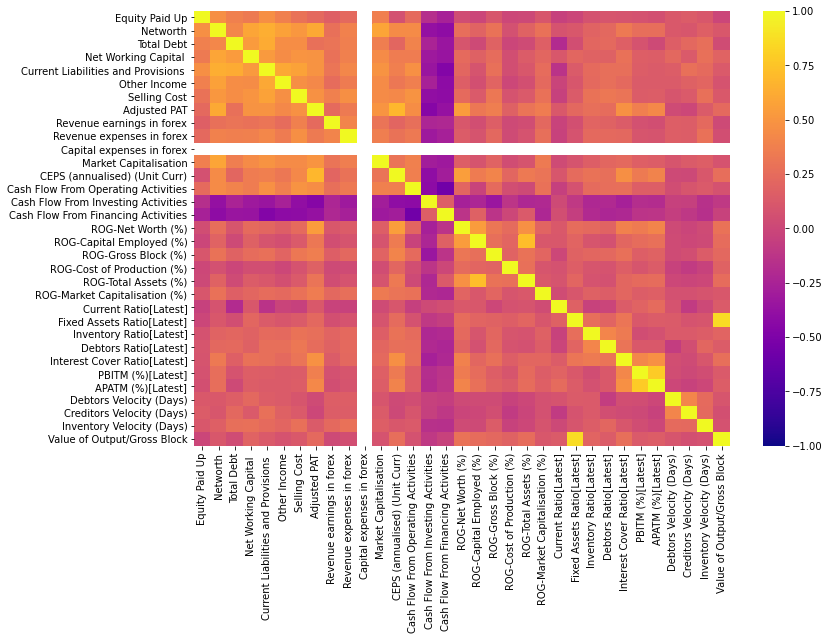

In [455]:
plt.figure(figsize = (12,8))
cor_matrix = Company_imputed.drop('default', axis = 1).corr()
sns.heatmap(cor_matrix, cmap = 'plasma', vmin = -1, vmax= 1)

In [456]:
predictors_1 = Company_imputed.drop('default', axis = 1)
response_1 = Company_imputed['default']

In [457]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

#### Splitting the data into train and test sets

In [458]:
X_train, X_test, y_train, y_test = train_test_split(predictors_1, response_1, 
                                                    test_size = 0.33, random_state = 42)

In [459]:
# Checking dimensions on the train and test data
print('X_train: ',X_train.shape)
print('X_test: ',X_test.shape)
print('train_labels: ',y_train.shape)
print('test_labels: ',y_test.shape)

X_train:  (2402, 33)
X_test:  (1184, 33)
train_labels:  (2402,)
test_labels:  (1184,)


#### For modeling we will use Logistic Regression with recursive feature elimination

In [460]:
LogR = LogisticRegression()

In [461]:
selector = RFE(estimator = LogR, n_features_to_select=12, step=1)

In [462]:
selector = selector.fit(X_train, y_train)

In [463]:
selector.n_features_

12

In [464]:
selector.ranking_

array([ 1,  1,  4, 11,  1,  1, 18,  5, 14, 12, 22, 20,  1,  9, 13, 15,  1,
        2, 16,  1,  3, 17,  1,  8, 21, 19,  1,  1,  1,  7, 10,  6,  1])

In [465]:
df = pd.DataFrame({'Feature': predictors_1.columns, 'Rank': selector.ranking_})
df[df['Rank'] == 1]

,Feature,Rank
0,Equity Paid Up,1
1,Networth,1
4,Current Liabilities and Provisions,1
5,Other Income,1
12,CEPS (annualised) (Unit Curr),1
16,ROG-Net Worth (%),1
19,ROG-Cost of Production (%),1
22,Current Ratio[Latest],1
26,Interest Cover Ratio[Latest],1
27,PBITM (%)[Latest],1


#### Univariate Analysis on Top 12 important features

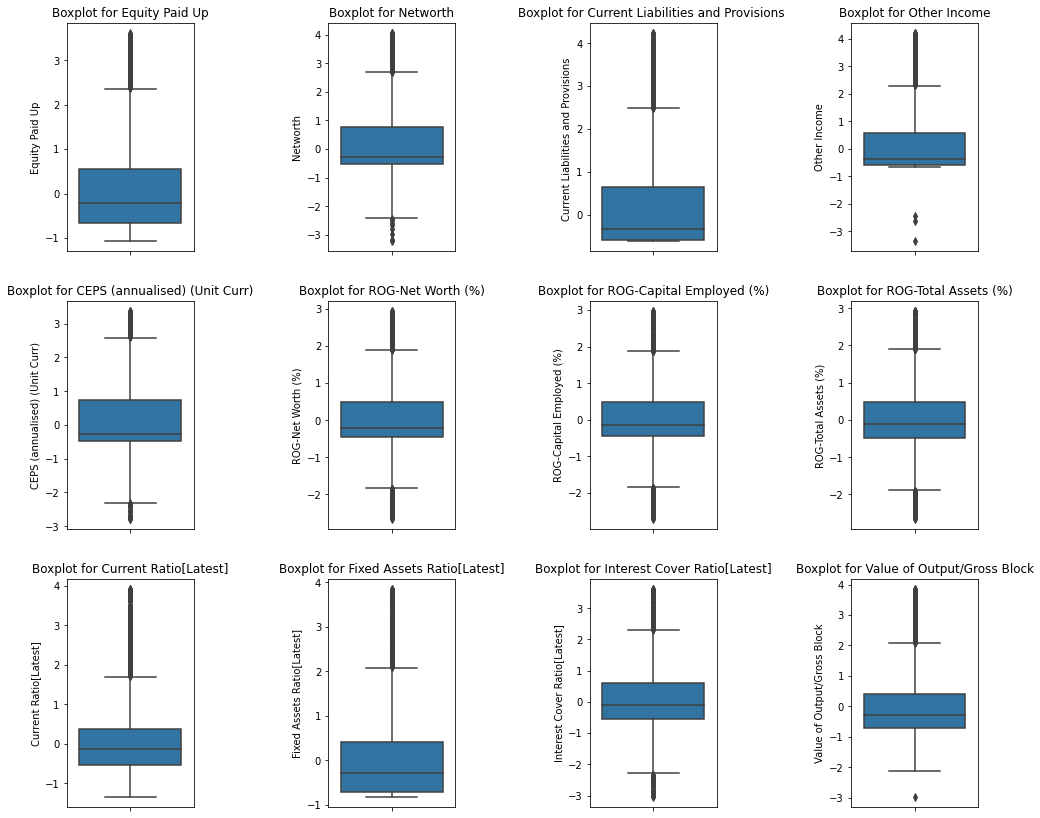

In [466]:
# Ploting the boxplots after capping the outliers
plt.figure(figsize=(15,12))
var=['Equity Paid Up','Networth', 'Current Liabilities and Provisions ', 'Other Income', 'CEPS (annualised) (Unit Curr)', 'ROG-Net Worth (%)', 'ROG-Capital Employed (%)', 'ROG-Total Assets (%)', 'Current Ratio[Latest]', 'Fixed Assets Ratio[Latest]', 'Interest Cover Ratio[Latest]', 'Value of Output/Gross Block']
for i in range(len(var)):
    plt.subplot(3,4,i+1)
    sns.boxplot(y=Company_imputed[var[i]], data = Company_imputed)
    plt.title('Boxplot for {}'.format(var[i]))
    plt.tight_layout(pad=3)


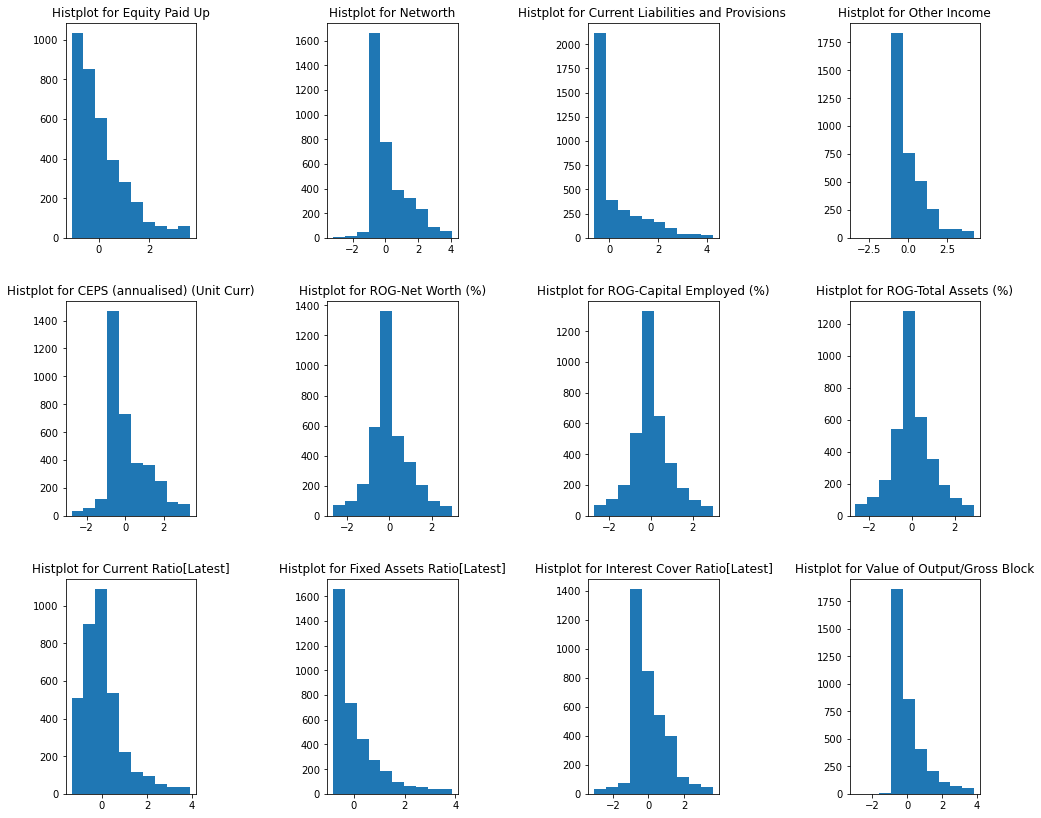

In [467]:
# Ploting the boxplots after capping the outliers
plt.figure(figsize=(15,12))
var=['Equity Paid Up','Networth', 'Current Liabilities and Provisions ', 'Other Income', 'CEPS (annualised) (Unit Curr)', 'ROG-Net Worth (%)', 'ROG-Capital Employed (%)', 'ROG-Total Assets (%)', 'Current Ratio[Latest]', 'Fixed Assets Ratio[Latest]', 'Interest Cover Ratio[Latest]', 'Value of Output/Gross Block']
for i in range(len(var)):
    plt.subplot(3,4,i+1)
    plt.hist(bins =10, x = Company_imputed[var[i]])
    plt.title('Histplot for {}'.format(var[i]))
    plt.tight_layout(pad=3)


#### Bivariate Analysis on Top 12 important features

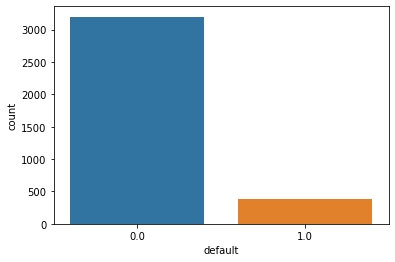

In [468]:
sns.countplot(x=Company_imputed['default'])

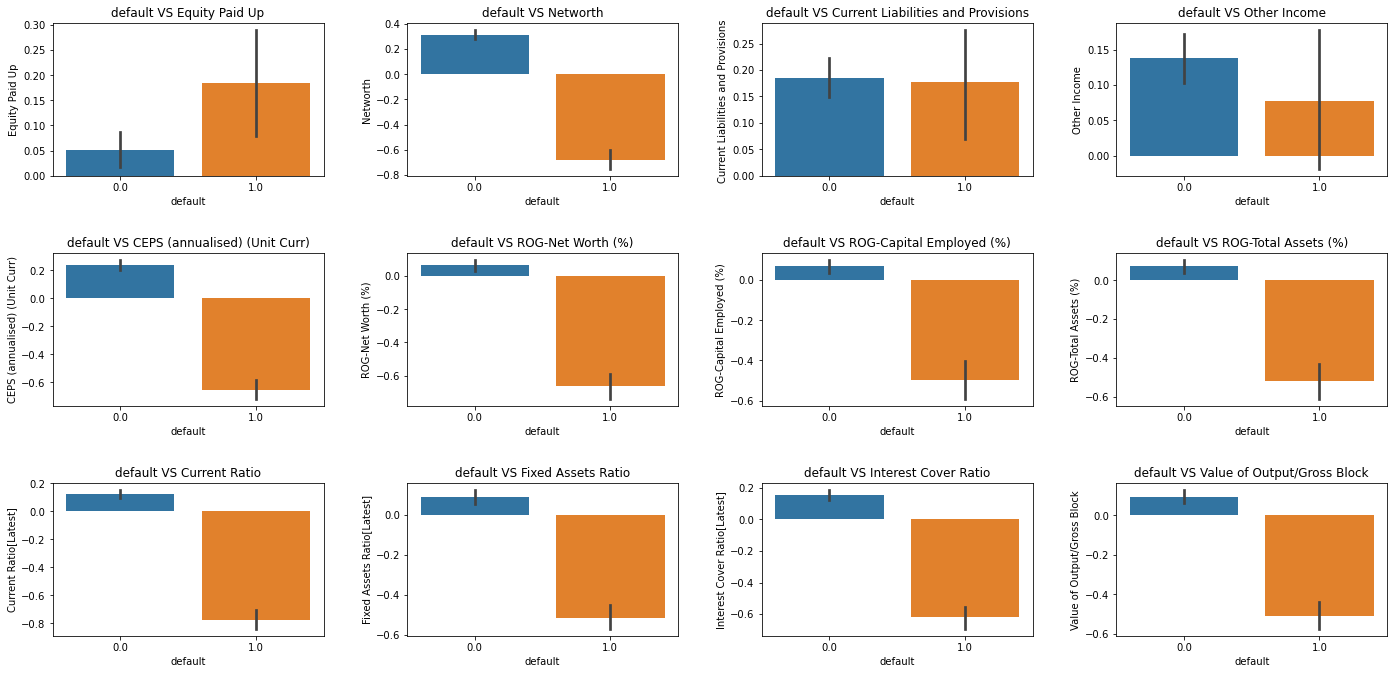

In [469]:
plt.figure(figsize=(20,10))

plt.subplot(3,4,1)
plt.title('default VS Equity Paid Up')
sns.barplot(x=Company_imputed['default'], y=Company_imputed['Equity Paid Up'], estimator=np.mean)

plt.subplot(3,4,2)
plt.title('default VS Networth')
sns.barplot(x=Company_imputed['default'], y=Company_imputed['Networth'], estimator=np.mean)

plt.subplot(3,4,3)
plt.title('default VS Current Liabilities and Provisions')
sns.barplot(x=Company_imputed['default'], y=Company_imputed['Current Liabilities and Provisions '], estimator=np.mean)

plt.subplot(3,4,4)
plt.title('default VS Other Income')
sns.barplot(x=Company_imputed['default'], y=Company_imputed['Other Income'], estimator=np.mean)

plt.subplot(3,4,5)
plt.title('default VS CEPS (annualised) (Unit Curr)')
sns.barplot(x=Company_imputed['default'], y=Company_imputed['CEPS (annualised) (Unit Curr)'], estimator=np.mean)

plt.subplot(3,4,6)
plt.title('default VS ROG-Net Worth (%)')
sns.barplot(x=Company_imputed['default'], y=Company_imputed['ROG-Net Worth (%)'], estimator=np.mean)

plt.subplot(3,4,7)
plt.title('default VS ROG-Capital Employed (%)')
sns.barplot(x=Company_imputed['default'], y=Company_imputed['ROG-Capital Employed (%)'], estimator=np.mean)

plt.subplot(3,4,8)
plt.title('default VS ROG-Total Assets (%)')
sns.barplot(x=Company_imputed['default'], y=Company_imputed['ROG-Total Assets (%)'], estimator=np.mean)

plt.subplot(3,4,9)
plt.title('default VS Current Ratio')
sns.barplot(x=Company_imputed['default'], y=Company_imputed['Current Ratio[Latest]'], estimator=np.mean)

plt.subplot(3,4,10)
plt.title('default VS Fixed Assets Ratio')
sns.barplot(x=Company_imputed['default'], y=Company_imputed['Fixed Assets Ratio[Latest]'], estimator=np.mean)

plt.subplot(3,4,11)
plt.title('default VS Interest Cover Ratio')
sns.barplot(x=Company_imputed['default'], y=Company_imputed['Interest Cover Ratio[Latest]'], estimator=np.mean)

plt.subplot(3,4,12)
plt.title('default VS Value of Output/Gross Block')
sns.barplot(x=Company_imputed['default'], y=Company_imputed['Value of Output/Gross Block'], estimator=np.mean)

plt.tight_layout(pad=3)

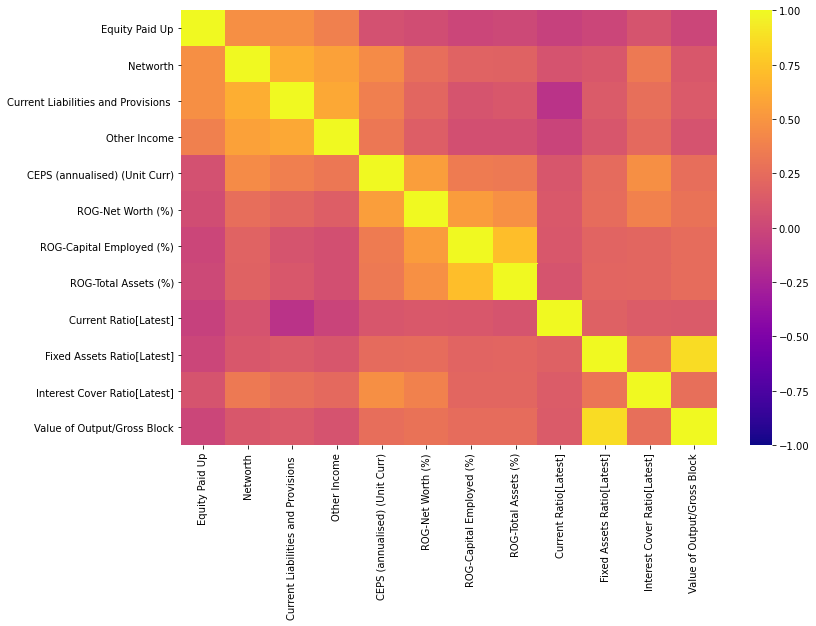

In [470]:
plt.figure(figsize = (12,8))
cor_matrix = Company_imputed[var].corr()
sns.heatmap(cor_matrix, cmap = 'plasma', vmin = -1, vmax= 1)

#### Multivariate Analysis on Top 12 important features

In [471]:
#sns.pairplot(Company_imputed[var])

#### Validating the model on train and test set 

In [472]:
from sklearn.metrics import confusion_matrix, classification_report

In [473]:
pred_train = selector.predict(X_train)
pred_test = selector.predict(X_test)

In [474]:
print(confusion_matrix(y_train, pred_train))

[[2134   23]
 [ 124  121]]


In [475]:
print(classification_report(y_train, pred_train))

              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97      2157
         1.0       0.84      0.49      0.62       245

    accuracy                           0.94      2402
   macro avg       0.89      0.74      0.79      2402
weighted avg       0.93      0.94      0.93      2402



In [476]:
print(confusion_matrix(y_test, pred_test))

[[1025   16]
 [  70   73]]


In [477]:
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

         0.0       0.94      0.98      0.96      1041
         1.0       0.82      0.51      0.63       143

    accuracy                           0.93      1184
   macro avg       0.88      0.75      0.79      1184
weighted avg       0.92      0.93      0.92      1184



We see poor recall score for both train and test

Since only 7% of the total data had defaults, we will now try to balance the data before fiting the model. 

In [478]:
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

In [479]:
selector_smote = selector.fit(X_res, y_res)

In [480]:
selector_smote.n_features_

12

In [481]:
pred_train_smote = selector_smote.predict(X_res)
pred_test_smote = selector_smote.predict(X_test)

In [482]:
print(classification_report(y_res, pred_train_smote))

              precision    recall  f1-score   support

         0.0       0.88      0.85      0.87      2157
         1.0       0.86      0.89      0.87      2157

    accuracy                           0.87      4314
   macro avg       0.87      0.87      0.87      4314
weighted avg       0.87      0.87      0.87      4314



In [487]:
print(confusion_matrix(y_test, pred_test_smote))

[[855 186]
 [ 16 127]]


In [483]:
print(classification_report(y_test, pred_test_smote))

              precision    recall  f1-score   support

         0.0       0.98      0.82      0.89      1041
         1.0       0.41      0.89      0.56       143

    accuracy                           0.83      1184
   macro avg       0.69      0.85      0.73      1184
weighted avg       0.91      0.83      0.85      1184



Finally, we are able to achieve a descent recall value without overfitting. Considering the opportunities such as outliers, missing values and correlated features this is a fairly good model. It can be improved if we get better quality data where the features explaining the default are not missing to this extent. Of course we can try other techniques which are not sensitive towards missing values and outliers.

## END